In [ ]:
#21BAI1479
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [ ]:
#21BAI1479
from sklearn.model_selection  import train_test_split

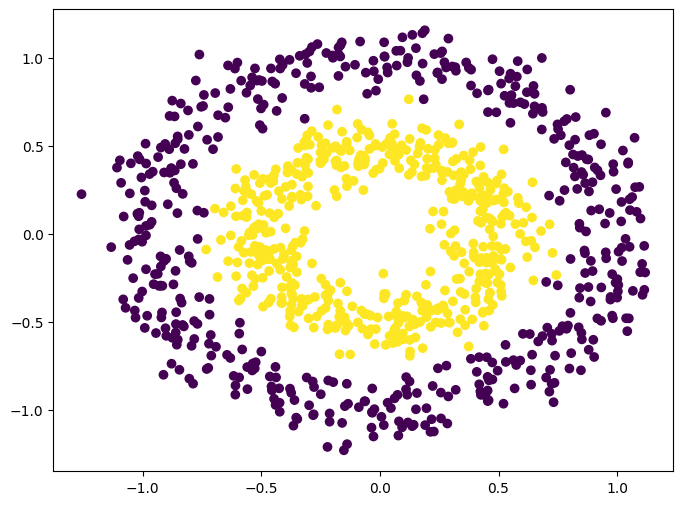

In [ ]:
#21BAI1479
tf.random.set_seed(42)
np.random.seed(42)

x,y = make_circles(n_samples=1000,factor = 0.5,noise = 0.1)
plt.figure(figsize =(8,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [ ]:
#21BAI1479
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from keras import models
from keras import layers
#21BAI1479
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [ ]:
#21BAI1479
model = models.Sequential()
model.add(layers.Dense(5,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = "adam")
model.fit(x_train,y_train,epochs = 5,verbose = 0)
print("accuracy",model.evaluate(x_test,y_test)[0],"loss",model.evaluate(x_test,y_test)[1])


10/10 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.5267
accuracy 0.6333795189857483 loss 0.5266666412353516


In [ ]:
#21BAI1479
model2 = models.Sequential()
model2.add(layers.Dense(5,activation = 'sigmoid'))
model2.add(layers.Dense(1,activation = 'sigmoid'))
model2.compile(loss= 'binary_crossentropy', metrics = ['accuracy'],optimizer = 'rmsprop')
model2.fit(x_train,y_train,epochs = 10,verbose =0)
print("accuracy:",model2.evaluate(x_test,y_test)[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4767
accuracy: 0.6965434551239014


In [ ]:
#21BAI1479
model3 = models.Sequential()
model3.add(layers.Dense(3,activation = "sigmoid"))
model3.add(layers.Dense(3,activation = "sigmoid"))
model3.add(layers.Dense(3,activation = "sigmoid"))
model3.add(layers.Dense(1,activation = "sigmoid"))
model3.compile(loss='binary_crossentropy',metrics = ['accuracy'])
model3.fit(x_train,y_train,epochs = 10,verbose = 0)
print("accuracy",model2.evaluate(x_test,y_test)[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.4767
accuracy 0.6965434551239014


**Gradient Descent - Sigmoid**

In [ ]:
# Illustrate weights across epochs
#21BAI1479
class WeightCapture(Callback):
    "Capture the weights of each layer of the model"
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.weights = []
        self.epochs = []

    def on_epoch_end(self, epoch, logs=None):
        self.epochs.append(epoch) # remember the epoch axis
        weight = {}
        for layer in model.layers:
            if not layer.weights:
                continue
            name = layer.weights[0].name.split("/")[0]
            weight[name] = layer.weights[0].numpy()
        self.weights.append(weight)

def make_mlp(activation, initializer, name):
    "Create a model with specified activation and initalizer"
    model = Sequential([
        Input(shape=(2,), name=name+"0"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"1"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"2"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"3"),
        Dense(5, activation=activation, kernel_initializer=initializer, name=name+"4"),
        Dense(1, activation="sigmoid", kernel_initializer=initializer, name=name+"5")
    ])
    return model


In [ ]:
#21BAI1479
def plotweight(capture_cb):
    "Plot the weights' mean and s.d. across epochs"
    fig, ax = plt.subplots(2, 1, sharex=True, constrained_layout=True, figsize=(4, 6))
    ax[0].set_title("Mean weight")
    for key in capture_cb.weights[0]:
        ax[0].plot(capture_cb.epochs, [w[key].mean() for w in capture_cb.weights], label=key)
    ax[0].legend()
    ax[1].set_title("S.D.")
    for key in capture_cb.weights[0]:
        ax[1].plot(capture_cb.epochs, [w[key].std() for w in capture_cb.weights], label=key)
    ax[1].legend()
    plt.show()

In [ ]:
#21BAI1479
initializer = RandomNormal(mean=0, stddev=1)
batch_size = 32
n_epochs = 100

**Case for sigmoid neuron**

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.5
After training: Accuracy 0.57
32/32 [==============================] - 0s 2ms/step - loss: 0.6746 - accuracy: 0.5700
[0.6745682954788208, 0.5699999928474426]


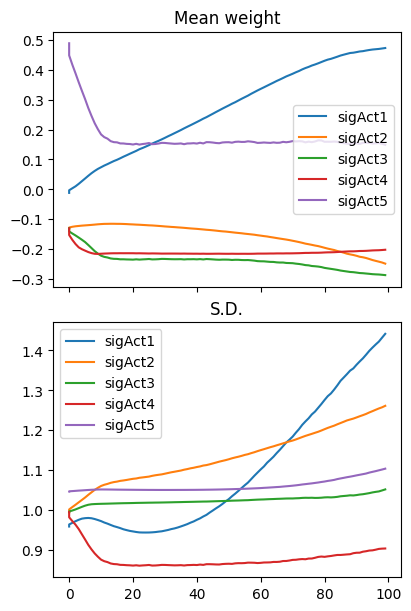

In [ ]:
#21BAI1479
model = make_mlp("sigmoid", initializer, "sigAct")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(0)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
print("Before training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
model.fit(x, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
print(model.evaluate(x,y))
plotweight(capture_cb)

**Tan - h activated Neuron**

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.503
After training: Accuracy 0.996
32/32 [==============================] - 0s 2ms/step - loss: 0.0149 - acc: 0.9960
[0.014890125952661037, 0.9959999918937683]


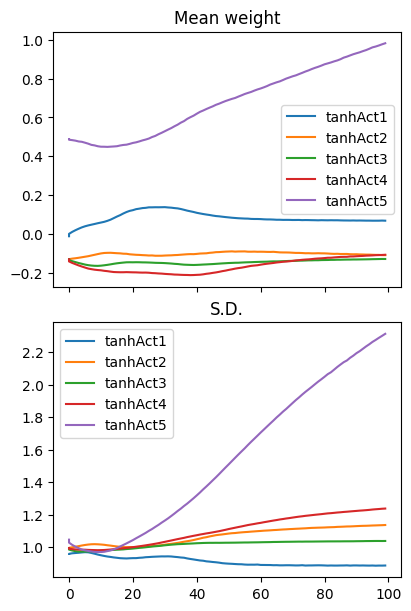

In [ ]:
#21BAI1479
model = make_mlp("tanh", initializer, "tanhAct")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(0)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
model.fit(x, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
print(model.evaluate(x,y))
plotweight(capture_cb)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Before training: Accuracy 0.497
After training: Accuracy 0.992
32/32 [==============================] - 0s 2ms/step - loss: 0.0743 - acc: 0.9920
[0.07426241785287857, 0.9919999837875366]


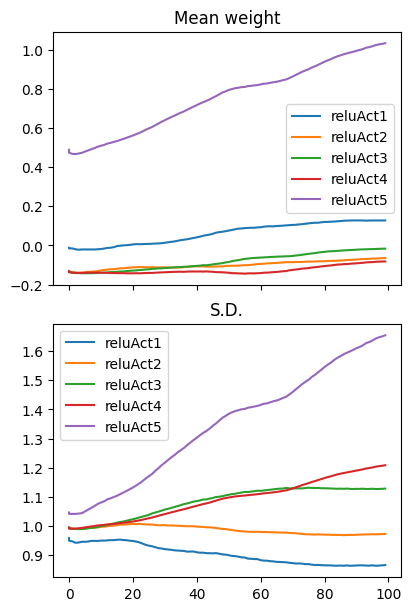

In [ ]:
#21BAI1479
model = make_mlp("relu", initializer, "reluAct")
capture_cb = WeightCapture(model)
capture_cb.on_epoch_end(0)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
print("Before training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
model.fit(x, y, batch_size=batch_size, epochs=n_epochs, callbacks=[capture_cb], verbose=0)
print("After training: Accuracy", accuracy_score(y, (model(x).numpy() > 0.5).astype(int)))
print(model.evaluate(x,y))
plotweight(capture_cb)

**Comparison of:**

*   Gradient Descent
*   Stoichastic Gradient descent
*   Mini Batch SGD

All three models have the same optimizer but differ in their batch size
   * GD - Entire dataset in 1 shot( 1 forward and backward pass)
   * SGD - Only one sample is taken at a time and processed (batch_size =1)
   * Mini batch SGD - A batch size is specified (32) samples / epoch









In [ ]:
# GRADIENT DESCENT
#21BAI1479
gradient = models.Sequential()
gradient.add(layers.Dense(32,activation = 'relu'))
gradient.add(layers.Dense(1, activation = 'sigmoid'))
optimiser = tf.keras.optimizers.SGD(learning_rate = 0.01)
gradient.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer =optimiser) #no optimizer and no batches
gradient.fit(x_train,y_train,epochs = 5)
print("Accuracy:",gradient.evaluate(x_test,y_test)[0])

Epoch 1/5
22/22 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.5086
Epoch 2/5
22/22 [==============================] - 0s 7ms/step - loss: 0.6924 - accuracy: 0.5143
Epoch 3/5
22/22 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5057
Epoch 4/5
22/22 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.5100
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4867
Accuracy: 0.6969253420829773


In [ ]:
# SGD
#21BAI1479
SGD = models.Sequential()
SGD.add(layers.Dense(32,activation = 'relu'))
SGD.add(layers.Dense(1,activation = 'sigmoid'))
optimiser = tf.keras.optimizers.SGD(learning_rate = 0.01)
SGD.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = optimiser)
SGD.fit(x_train,y_train,epochs = 5,batch_size = 1)
print("Accuracy: ",SGD.evaluate(x_test,y_test)[0])

Epoch 1/5
700/700 [==============================] - 2s 2ms/step - loss: 0.7220 - accuracy: 0.4229
Epoch 2/5
700/700 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5800
Epoch 3/5
700/700 [==============================] - 1s 2ms/step - loss: 0.6319 - accuracy: 0.6786
Epoch 4/5
700/700 [==============================] - 1s 2ms/step - loss: 0.5906 - accuracy: 0.9200
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.9767
Accuracy:  0.524469256401062


In [ ]:
# mini batch SGD
#21BAI1479
mini_batch = models.Sequential()
mini_batch.add(layers.Dense(32,activation = 'relu'))
mini_batch.add(layers.Dense(1,activation = 'sigmoid'))
optimiser = tf.keras.optimizers.SGD(learning_rate = 0.01)
mini_batch.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = optimiser)
mini_batch.fit(x_train,y_train,epochs = 5,batch_size = 32)
print("Accuracy: ",mini_batch.evaluate(x_test,y_test)[0])

Epoch 1/5
22/22 [==============================] - 1s 3ms/step - loss: 0.6920 - accuracy: 0.4800
Epoch 2/5
22/22 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.4971
Epoch 3/5
22/22 [==============================] - 0s 4ms/step - loss: 0.6880 - accuracy: 0.4629
Epoch 4/5
22/22 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.4986
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.4933
Accuracy:  0.682843804359436
